In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats  

Dans un cadre bayésien, on considère que la loi a priori sur $\theta $ est gaussienne standard et que, sachant $\theta $, les observations $(X_i)_{1,...,n}$ sont i.i.d. selon une loi normale de moyenne $\theta $ et de variance 1, autrement dit :

- $\theta \sim \mathcal{N}(0,1)$
- $X_1, ..., X_n | \theta \sim \mathcal{N}(\theta,1) ^{\times n}$

Un résultat qui se démontre facilement est que : $\theta | X_1, ..., X_n \sim \mathcal{N} ( \frac{n}{n+1} \bar{X_n}, \frac{1}{n+1} ) $

## Étape 1 

- Effectuer un tirage de $\theta $ suivant la loi gaussienne standard : on note $\theta _0 $ cette réalisation. 

- Pour n=10, générer des réalisations des variables $X_i $ i.i.d. selon une loi normale de moyenne $\theta _0 $ et de variance 1. 

- Représenter sur un même graphique la densité a priori de $\theta  $ et les densités a posteriori des lois de θ sachant $(X_1,X_2,X_3)$, sachant $(X_1,...,X_5)$ et sachant $(X_1,...,X_{10}) $.

- Ajouter sur l'axe des abscisses les points de l'échantillon et leur moyenne empirique.

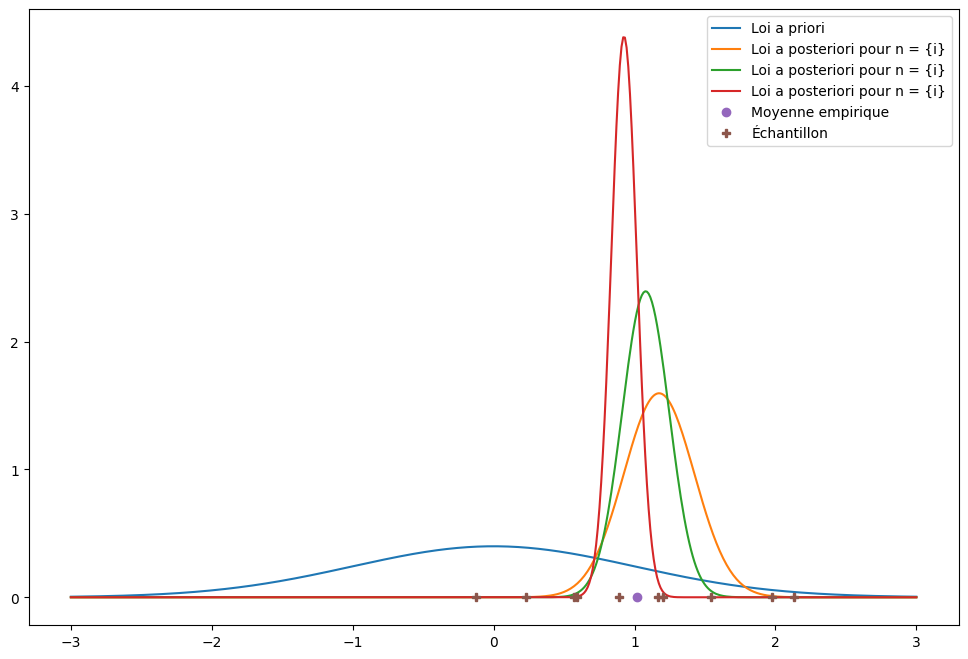

In [16]:
prior = stats.norm(loc=0, scale=1)
theta_0 = prior.rvs() 
ptheta = stats.norm(loc = theta_0, scale=1)

n = 10
X = ptheta.rvs(size = n)
x = np.linspace(-3,3,500)

plt.figure(figsize=(12,8))
#densité a priori 
plt.plot(x, prior.pdf(x), label = "Loi a priori")

for i in [3,5,10]:
    posterior = stats.norm(loc = X[:i].mean() * i/(i+1), scale= (1 / (i+1)))
    plt.plot(x, posterior.pdf(x), label = "Loi a posteriori pour n = {i}")

plt.plot(X.mean(), 0, "o", label="Moyenne empirique")
plt.plot(X, [0] * X.size, "P", label="Échantillon")
plt.legend()
plt.show()

Rappelons l'expression de l'estimateur de Bayes : $ \hat{ \theta _n } = \displaystyle \int \theta \pi (\theta | X) d \theta = \mathbb{E} [ \theta | X] = \frac{n}{n+1} \bar{X_n}$. 

In [17]:
print(f"Estimateur de Bayes : {X.mean() * n/(n+1):.2}")

Estimateur de Bayes : 0.93


Retrouvons cette valeur par une méthode d'approximation Monte-Carlo basée sur la simulation de N variables $ \theta _i $ i.i.d. selon la loi a priori. Pour $N$ variant de 1 à 1000, on tracera sur un même graphique la droite $ y= \hat{\theta _n} $ et l'évolution de l'estimateur Monte-Carlo.

On peut réécrire : $\hat{\theta _n} = \frac{ \mathbb{E} ( \theta p( X | \theta )) } {\mathbb{E}  (p( X | \theta ))}$ où $ p( X | \theta ) = \displaystyle \prod _{i=1} ^N \frac{1}{\sqrt{2 \pi } } \exp{- \frac{(x_i - \theta )^2}{2}} $. 

Cela conduit à l'estimateur : $ \theta ^{N} = \displaystyle \frac{\frac{1}{N} \displaystyle \sum _{i=1} ^N \theta _i p_{ \theta _i} (X)}{\frac{1}{N} \displaystyle \sum _{i=1} ^N  p_{ \theta _i} (X)}$.

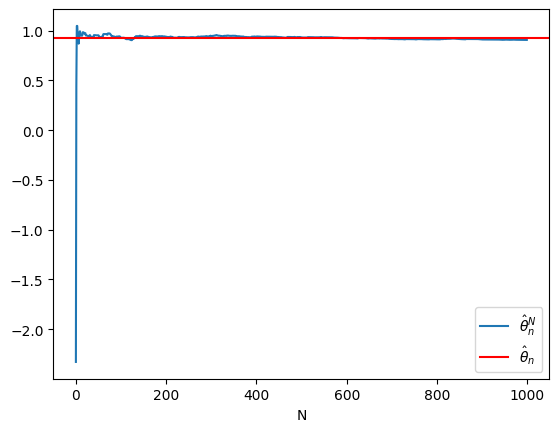

In [18]:
N = 1000 
thetas = prior.rvs(size=N)
likelihood = np.asarray([stats.norm(loc=theta, scale=1).pdf(X).prod() for theta in thetas])
estMC = (thetas * likelihood).cumsum() / likelihood.cumsum()
fig = plt.figure()

plt.plot(estMC, label="$\\hat\\theta_n^N$")
plt.axhline(X.mean() * n/(n+1), color="red", label="$\\hat\\theta_n$")
plt.xlabel('N')
plt.legend()